In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

from  utils.run_foraging_testbed import run_sessions_parallel, para_scan, para_optimize
# from utils.foraging_testbed_models import BanditRestless, Bandit

from models.bandit_model import BanditModel as Bandit    # Use new class
from models.bandit_model import BanditModelRestless as BanditRestless


n_worker = int(mp.cpu_count())  # Optimal number = number of physical cores
pool = mp.Pool(processes = n_worker)

# Bandit_block

Use updated model: LNP_softmax

apply_async: 100%|██████████| 20000/20000 [01:32<00:00, 215.82it/s]


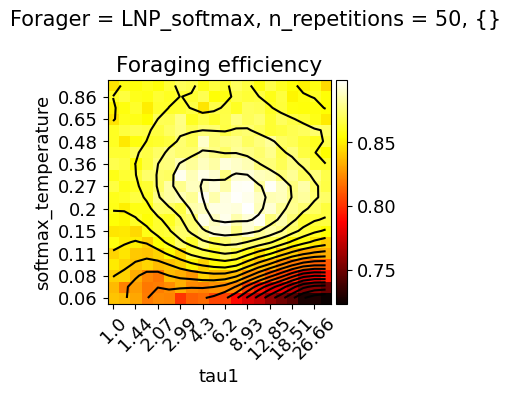

In [2]:
para_scan(forager='LNP_softmax', 
          task='Bandit_block',
          para_to_scan={'tau1': np.power(2, np.linspace(0,5,20)), 
                        'softmax_temperature': np.power(2, np.linspace(-4,0,20))}, 
          n_reps=50, pool=pool);

apply_async: 100%|██████████| 500/500 [00:02<00:00, 208.46it/s]


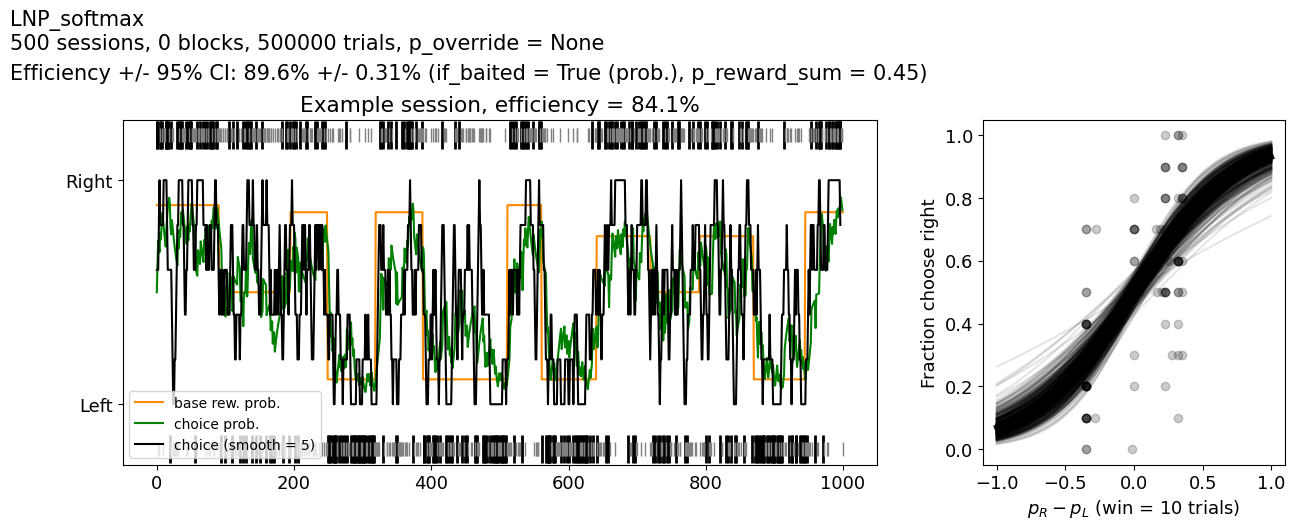

In [5]:
bandit = Bandit(forager='LNP_softmax',  softmax_temperature=0.25, tau1=7)
results_all_sessions = run_sessions_parallel(bandit, n_reps=500, pool=pool)

Just implemented `LNP_epsi` in the new class

apply_async: 100%|██████████| 20000/20000 [01:10<00:00, 282.66it/s]


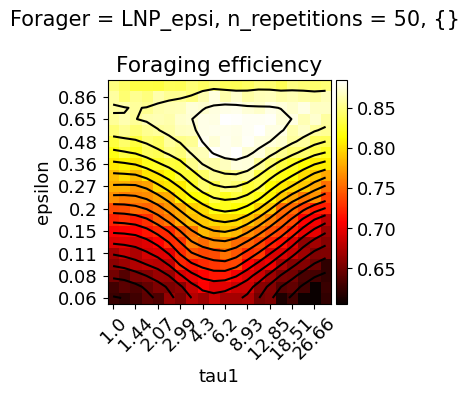

In [5]:
para_scan(forager='LNP_epsi', 
          task='Bandit_block',
          para_to_scan={'tau1': np.power(2, np.linspace(0,5,20)), 
                        'epsilon': np.power(2, np.linspace(-4,0,20))}, 
          n_reps=50, pool=pool);

apply_async: 100%|██████████| 500/500 [00:02<00:00, 246.88it/s]


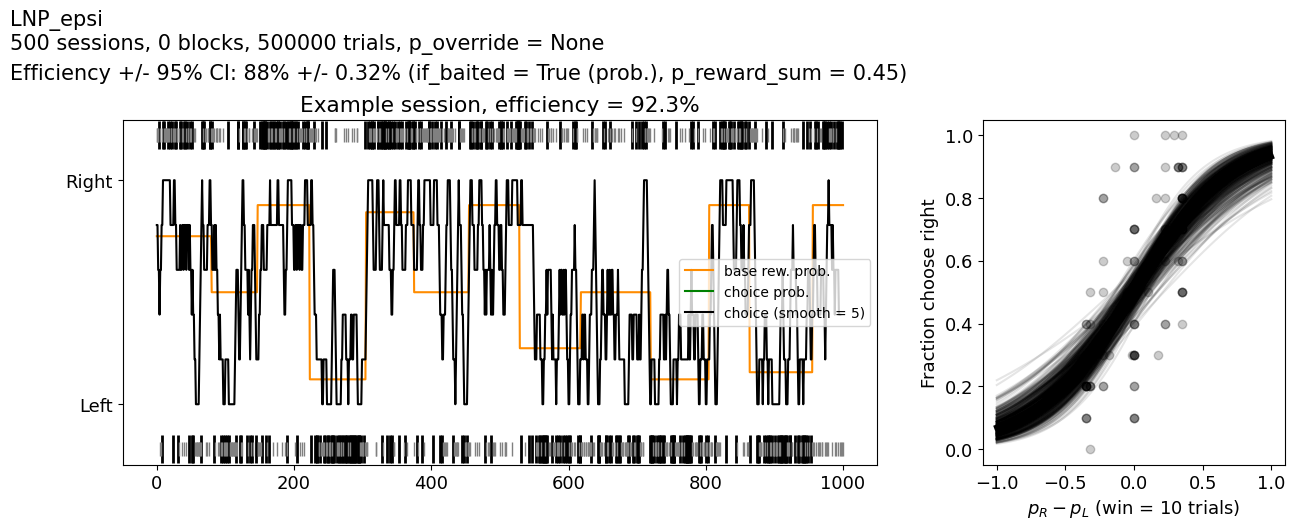

In [7]:
bandit = Bandit(forager='LNP_epsi',  epsilon=0.48, tau1=7)
results_all_sessions = run_sessions_parallel(bandit, n_reps=500, pool=pool)

differential_evolution step 1: f(x)= -0.904713
differential_evolution step 2: f(x)= -0.916786
differential_evolution step 3: f(x)= -0.916786
differential_evolution step 4: f(x)= -0.916786
differential_evolution step 5: f(x)= -0.916786
differential_evolution step 6: f(x)= -0.916786
differential_evolution step 7: f(x)= -0.916786
differential_evolution step 8: f(x)= -0.916786
differential_evolution step 9: f(x)= -0.916786
Polishing solution with 'L-BFGS-B'


apply_async: 100%|██████████| 500/500 [00:02<00:00, 242.31it/s]


 message: Optimization terminated successfully.
 success: True
     fun: -0.9167859060680282
       x: [ 5.292e+00  4.587e-01]
     nit: 9
    nfev: 463
['tau1', 'epsilon']
--- para_optimize finished in 44.1272 s ---


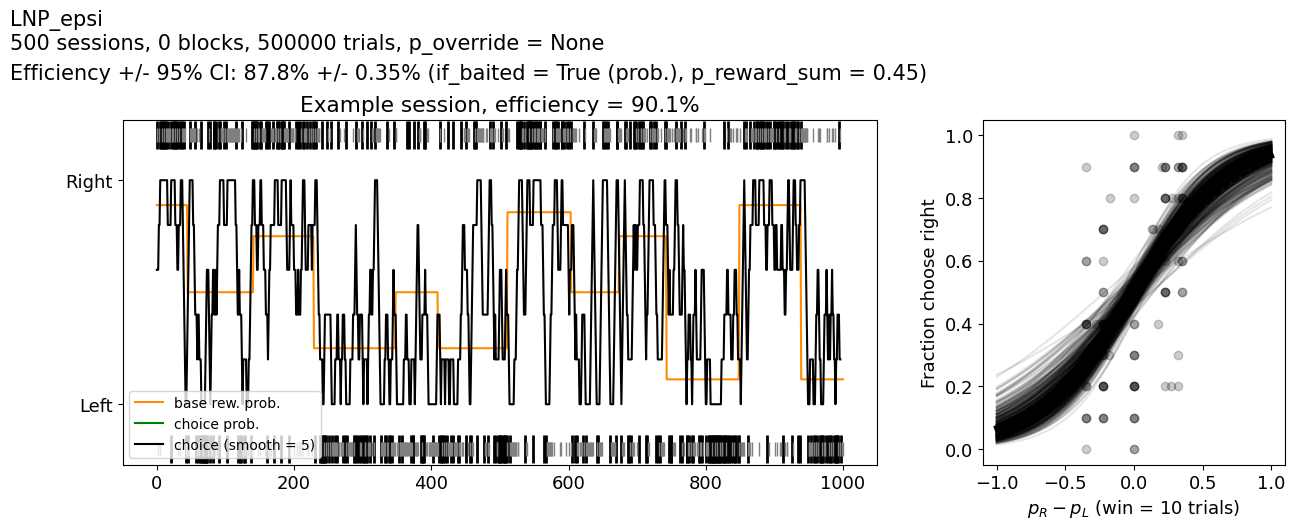

In [4]:
opti_para = para_optimize('LNP_epsi', n_reps_per_iter = 10, pool = pool, 
              opti_names = ['tau1', 'epsilon'],
              bounds = optimize.Bounds([1,0],[20,1]))   

## Restless bandit, `sigma = 0.08`

apply_async: 100%|██████████| 20000/20000 [01:33<00:00, 213.81it/s]


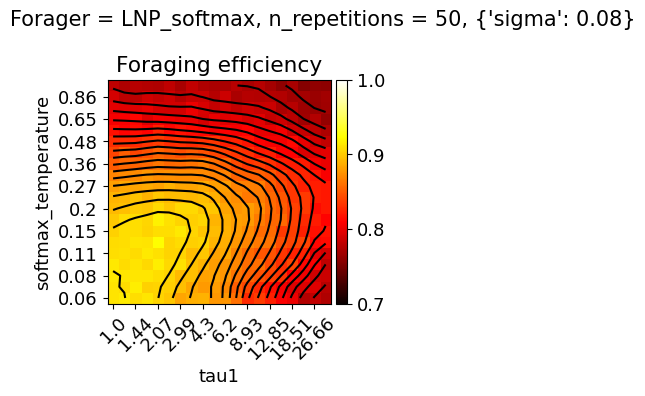

In [19]:
para_to_scan={'tau1': np.power(2, np.linspace(0,5,20)), 
                                  'softmax_temperature': np.power(2, np.linspace(-4,0,20))}
results_para_scan = para_scan(forager='LNP_softmax', 
                   task='Bandit_restless',
                   sigma=0.08,
                    para_to_scan=para_to_scan, 
                   n_reps=50, pool=pool)

apply_async: 100%|██████████| 20000/20000 [01:37<00:00, 205.85it/s]


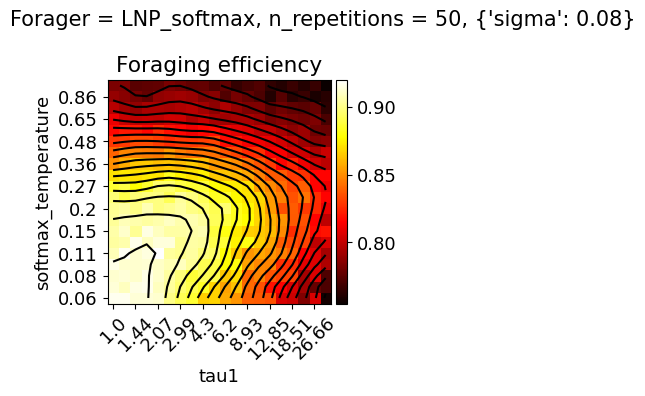

In [5]:
results_para_scan = para_scan(forager='LNP_softmax', 
                   task='Bandit_restless',
                   sigma=0.08,
                    para_to_scan={'tau1': np.power(2, np.linspace(0,5,20)), 
                                  'softmax_temperature': np.power(2, np.linspace(-4,0,20))}, 
                   n_reps=50, pool=pool)

apply_async: 100%|██████████| 100/100 [00:00<00:00, 176.37it/s]


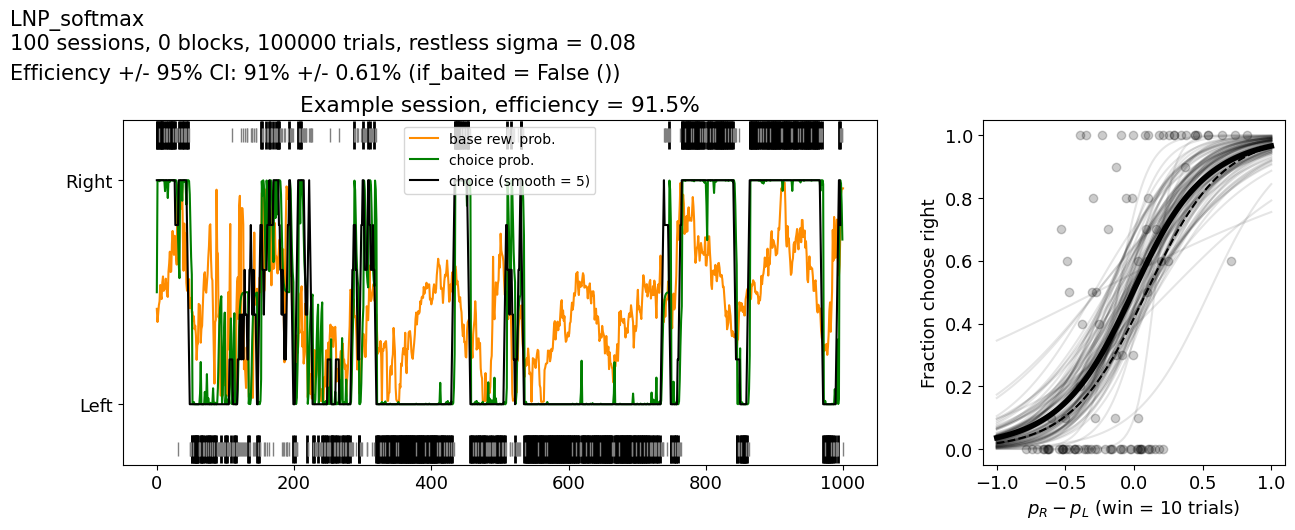

In [7]:
bandit = BanditRestless(forager='LNP_softmax',  
                        sigma=0.08,
                        softmax_temperature=0.08,
                        tau1=1.4, )
results_all_sessions = run_sessions_parallel(bandit, n_reps=100, pool=pool)

apply_async: 100%|██████████| 20000/20000 [01:14<00:00, 266.83it/s]


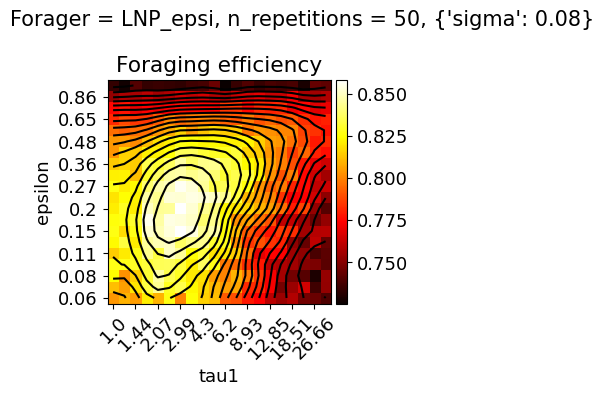

In [9]:
results_para_scan = para_scan(forager='LNP_epsi', 
                   task='Bandit_restless', sigma=0.08,
                   para_to_scan={'tau1': np.power(2, np.linspace(0,5,20)), 
                                 'epsilon': np.power(2, np.linspace(-4,0,20))}, 
                   n_reps=50, pool=pool)

apply_async: 100%|██████████| 100/100 [00:00<00:00, 254.75it/s]


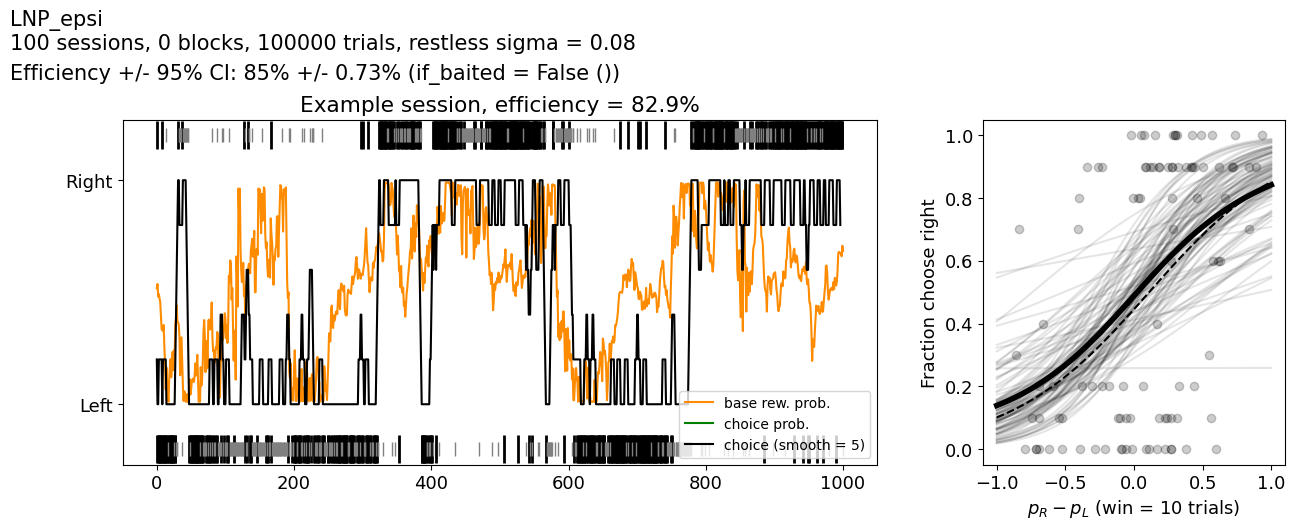

In [15]:
bandit = BanditRestless(forager='LNP_epsi',
                        sigma=0.08,
                        epsilon=0.2,
                        tau1=3, )
results_all_sessions = run_sessions_parallel(bandit, n_reps=100, pool=pool)

## Restless bandit, `sigma = 0.15`

apply_async: 100%|██████████| 20000/20000 [01:35<00:00, 209.17it/s]


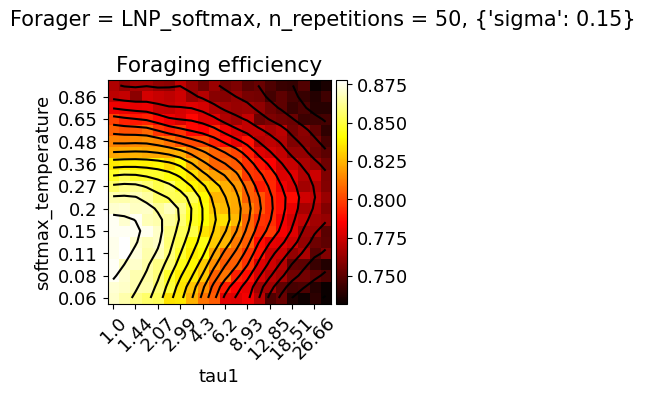

In [8]:
results_para_scan = para_scan(forager='LNP_softmax', 
                   task='Bandit_restless',
                   sigma=0.15,
                    para_to_scan={'tau1': np.power(2, np.linspace(0,5,20)), 
                                  'softmax_temperature': np.power(2, np.linspace(-4,0,20))}, 
                   n_reps=50, pool=pool)

apply_async: 100%|██████████| 20000/20000 [00:47<00:00, 419.78it/s]


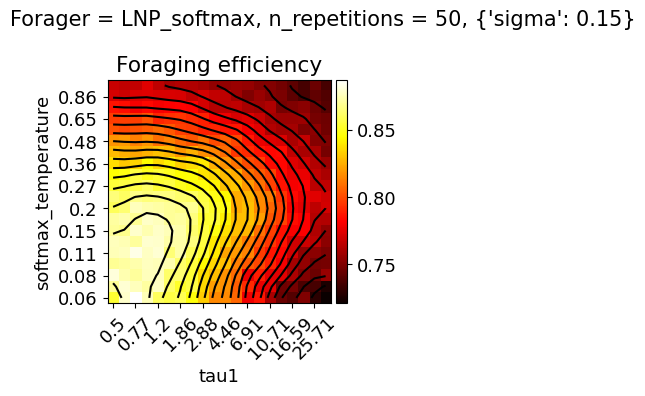

In [2]:
results_para_scan = para_scan(forager='LNP_softmax', 
                   task='Bandit_restless',
                   sigma=0.15,
                    para_to_scan={'tau1': np.power(2, np.linspace(-1,5,20)), 
                                  'softmax_temperature': np.power(2, np.linspace(-4,0,20))}, 
                   n_reps=50, pool=pool)

differential_evolution step 1: f(x)= -0.861576
differential_evolution step 2: f(x)= -0.873241
differential_evolution step 3: f(x)= -0.879694
differential_evolution step 4: f(x)= -0.879694
differential_evolution step 5: f(x)= -0.879694
differential_evolution step 6: f(x)= -0.879694
differential_evolution step 7: f(x)= -0.880397
Polishing solution with 'L-BFGS-B'


/root/capsule/utils/helper_func.py:17: RuntimeWarning: invalid value encountered in divide
  X = x/softmax_temperature + bias   # Backward compatibility
/root/capsule/utils/helper_func.py:17: RuntimeWarning: invalid value encountered in divide
  X = x/softmax_temperature + bias   # Backward compatibility
/root/capsule/utils/helper_func.py:17: RuntimeWarning: invalid value encountered in divide
  X = x/softmax_temperature + bias   # Backward compatibility
/root/capsule/utils/helper_func.py:17: RuntimeWarning: invalid value encountered in divide
  X = x/softmax_temperature + bias   # Backward compatibility
/root/capsule/utils/helper_func.py:17: RuntimeWarning: invalid value encountered in divide
  X = x/softmax_temperature + bias   # Backward compatibility
/root/capsule/utils/helper_func.py:17: RuntimeWarning: divide by zero encountered in divide
  X = x/softmax_temperature + bias   # Backward compatibility
/root/capsule/utils/helper_func.py:17: RuntimeWarning: divide by zero encountered

apply_async: 100%|██████████| 500/500 [00:01<00:00, 322.48it/s]


 message: Optimization terminated successfully.
 success: True
     fun: -0.8803973562930643
       x: [ 9.150e-01  1.105e-01]
     nit: 7
    nfev: 431
['tau1', 'softmax_temperature']
--- para_optimize finished in 73.8821 s ---


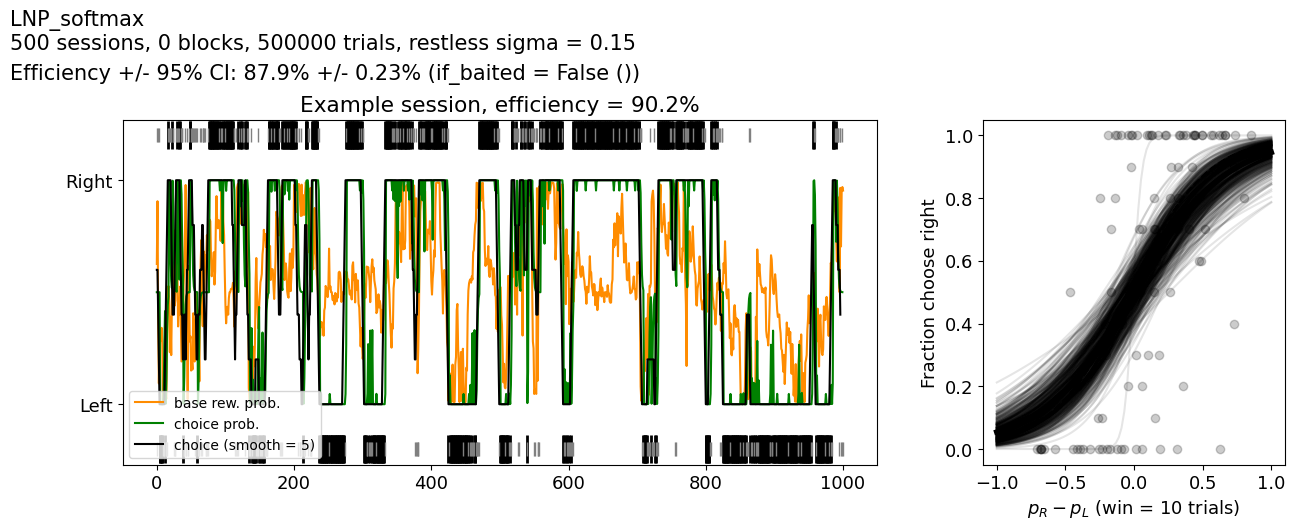

In [5]:
opti_para = para_optimize('LNP_softmax', n_reps_per_iter = 50, pool = pool,
                          task='Bandit_restless',
                          opti_names = ['tau1', 'softmax_temperature'],
                          bounds = optimize.Bounds([0.1,0],[20,1]))   

apply_async: 100%|██████████| 20000/20000 [01:14<00:00, 269.75it/s]


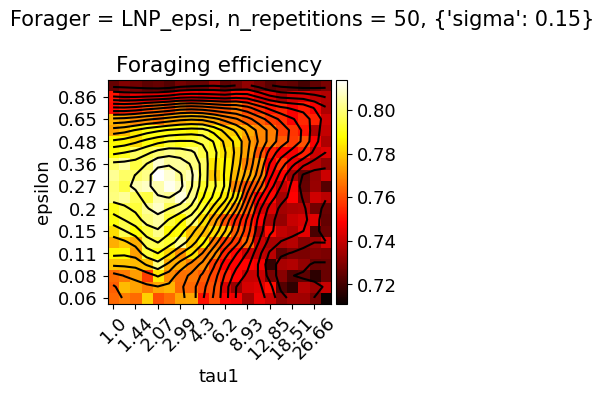

In [10]:
results_para_scan = para_scan(forager='LNP_epsi', 
                   task='Bandit_restless', sigma=0.15,
                   para_to_scan={'tau1': np.power(2, np.linspace(0,5,20)), 
                                 'epsilon': np.power(2, np.linspace(-4,0,20))}, 
                   n_reps=50, pool=pool)

differential_evolution step 1: f(x)= -0.82089
differential_evolution step 2: f(x)= -0.82089
differential_evolution step 3: f(x)= -0.821624
differential_evolution step 4: f(x)= -0.824115
Polishing solution with 'L-BFGS-B'


apply_async: 100%|██████████| 500/500 [00:00<00:00, 515.49it/s]


 message: Optimization terminated successfully.
 success: True
     fun: -0.8241149038538029
       x: [ 2.175e+00  2.813e-01]
     nit: 4
    nfev: 344
['tau1', 'epsilon']
--- para_optimize finished in 46.4859 s ---


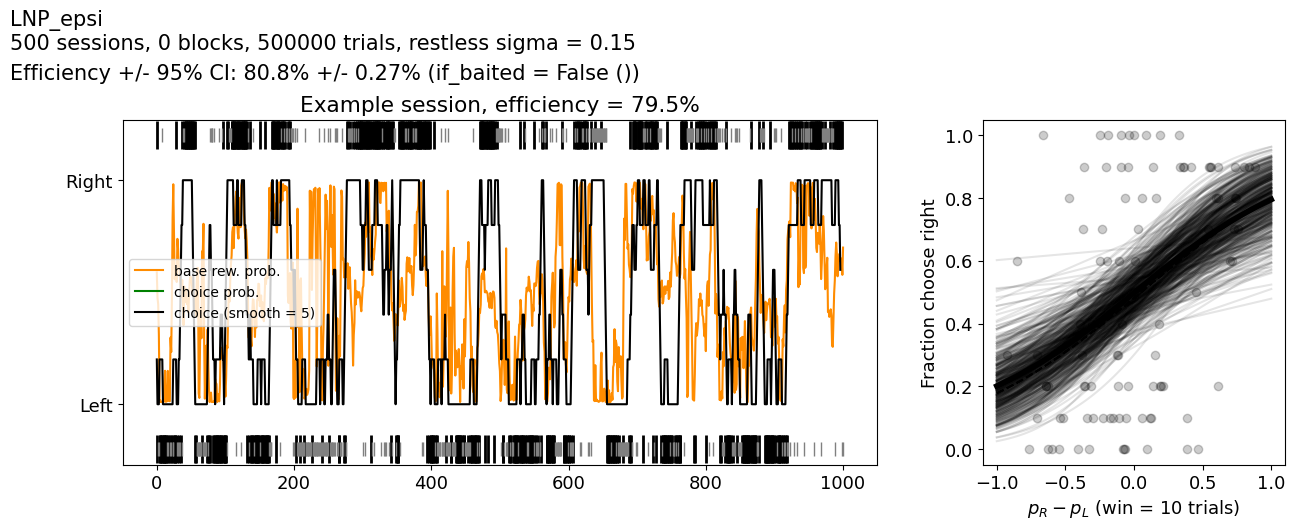

In [7]:
opti_para = para_optimize('LNP_epsi', n_reps_per_iter = 50, pool = pool,
                          task='Bandit_restless',
                          opti_names = ['tau1', 'epsilon'],
                          bounds = optimize.Bounds([0.1,0],[20,1]))   

## Restless bandit, `sigma = 0.20`

apply_async: 100%|██████████| 20000/20000 [01:35<00:00, 209.66it/s]


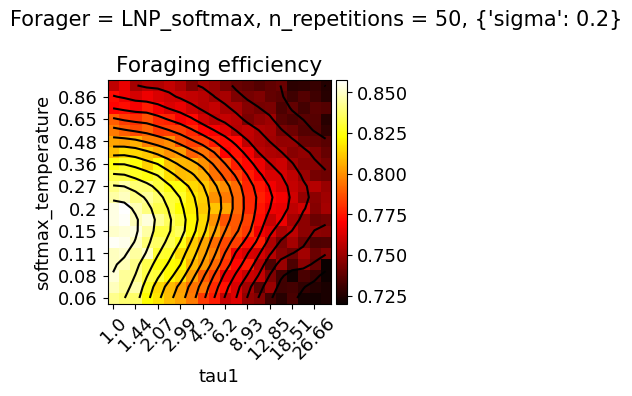

In [9]:
results_para_scan = para_scan(forager='LNP_softmax', 
                   task='Bandit_restless',
                   sigma=0.20,
                    para_to_scan={'tau1': np.power(2, np.linspace(0,5,20)), 
                                  'softmax_temperature': np.power(2, np.linspace(-4,0,20))}, 
                   n_reps=50, pool=pool)

differential_evolution step 1: f(x)= -0.84406
differential_evolution step 2: f(x)= -0.850613
differential_evolution step 3: f(x)= -0.850613
differential_evolution step 4: f(x)= -0.855912
differential_evolution step 5: f(x)= -0.855912
differential_evolution step 6: f(x)= -0.862948
differential_evolution step 7: f(x)= -0.863873
differential_evolution step 8: f(x)= -0.863873
differential_evolution step 9: f(x)= -0.863873
differential_evolution step 10: f(x)= -0.864335
Polishing solution with 'L-BFGS-B'


apply_async: 100%|██████████| 500/500 [00:01<00:00, 396.68it/s]


 message: Optimization terminated successfully.
 success: True
     fun: -0.8643345427969584
       x: [ 3.484e-01  1.105e-01]
     nit: 10
    nfev: 515
['tau1', 'softmax_temperature']
--- para_optimize finished in 87.8878 s ---


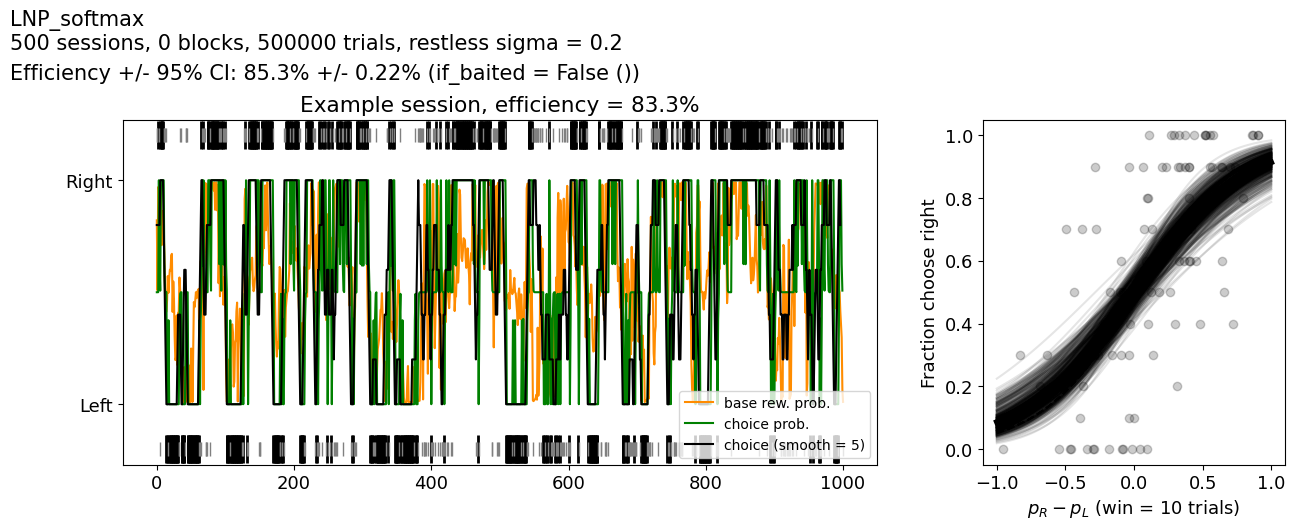

In [9]:
opti_para = para_optimize('LNP_softmax', n_reps_per_iter = 50, pool = pool,
                          sigma=0.20,
                          task='Bandit_restless',
                          opti_names = ['tau1', 'softmax_temperature'],
                          bounds = optimize.Bounds([0.1,0],[20,1]))   

apply_async: 100%|██████████| 20000/20000 [01:14<00:00, 269.01it/s]


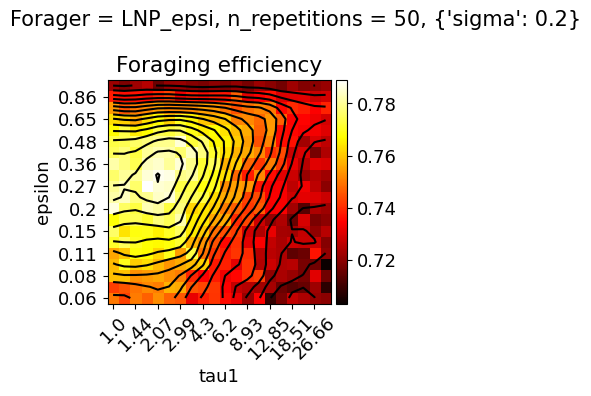

In [11]:
results_para_scan = para_scan(forager='LNP_epsi', 
                   task='Bandit_restless', sigma=0.20,
                   para_to_scan={'tau1': np.power(2, np.linspace(0,5,20)), 
                                 'epsilon': np.power(2, np.linspace(-4,0,20))}, 
                   n_reps=50, pool=pool)

differential_evolution step 1: f(x)= -0.79816
differential_evolution step 2: f(x)= -0.79816
differential_evolution step 3: f(x)= -0.798182
differential_evolution step 4: f(x)= -0.799759
Polishing solution with 'L-BFGS-B'


apply_async: 100%|██████████| 500/500 [00:01<00:00, 479.03it/s]


 message: Optimization terminated successfully.
 success: True
     fun: -0.7997588639578085
       x: [ 1.924e+00  4.012e-01]
     nit: 4
    nfev: 257
['tau1', 'epsilon']
--- para_optimize finished in 36.5313 s ---


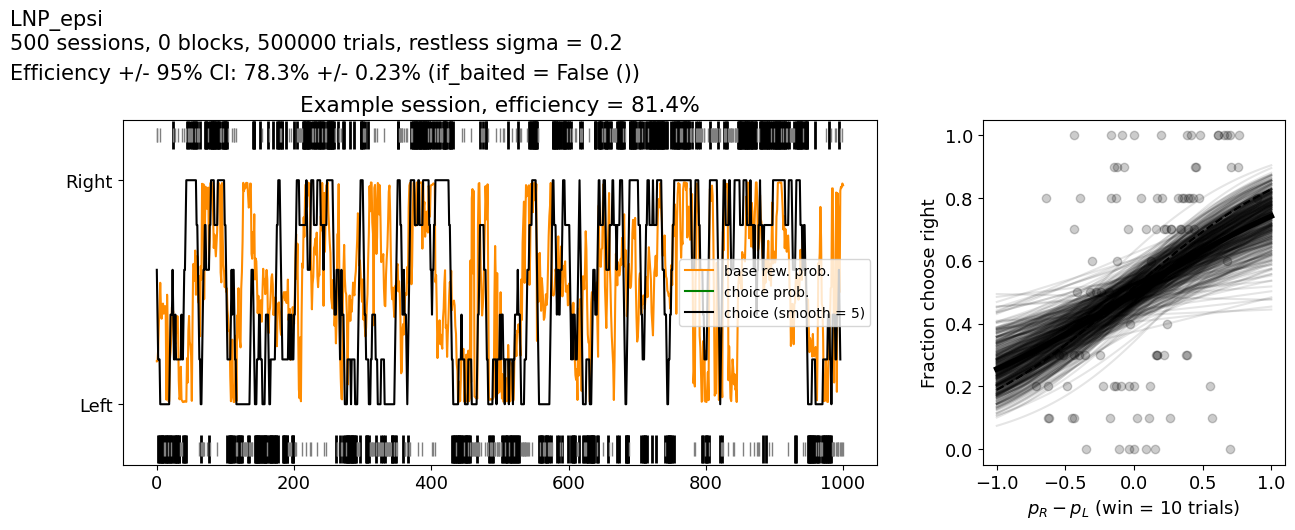

In [8]:
opti_para = para_optimize('LNP_epsi', n_reps_per_iter = 50, pool = pool,
                          task='Bandit_restless',
                          sigma=0.20,
                          opti_names = ['tau1', 'epsilon'],
                          bounds = optimize.Bounds([0.1,0],[20,1]))   